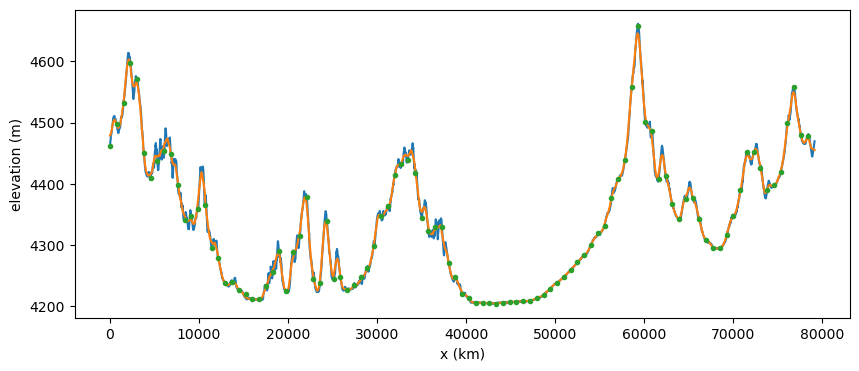

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "profile_elevation.csv"
outfname = "resamp_elevation.csv"

datain = pd.read_csv(filename)

x = datain["distance_km"].values
z = datain["elevation_m"].values
window_size = 20
# Reflective padding based on window size
pad_size = window_size // 2
padded_series = np.pad(z, (pad_size - 1, pad_size), mode="reflect")
zsmooth = np.convolve(padded_series, np.ones(window_size) / window_size, mode="valid")

# decimate data
ndec = 30

# export to new csv file
xvals = np.round(x[0::ndec] * 1000, 1)  # convert to meters from km
zvals = np.round(z[0::ndec], 1)
x1 = xvals[0:-1]
x2 = xvals[1:]
z1 = zvals[0:-1]
z2 = zvals[1:]
# Create a DataFrame from the NumPy arrays
df = pd.DataFrame({"x1": x1, "x2": x2, "z1": z1, "z2": z2})

# Write the DataFrame to a CSV file
df.to_csv(outfname, index=False)

plt.figure(figsize=(10, 4))
plt.plot(x * 1000, z)
plt.plot(x * 1e3, zsmooth)
plt.plot(xvals, zvals, ".")
plt.xlabel("x (km)")
plt.ylabel("elevation (m)")
plt.show()